# Wrangling the Billboard Top 100

#### Anisha Singh (as229583), Antra Sinha (as224589), Hayoung Kim (hk26786), Meenakshi Sundaram (ms88544)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
billboard = pd.read_csv('billboard.csv')

In [3]:
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327895 entries, 0 to 327894
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              327895 non-null  int64  
 1   url                     327895 non-null  object 
 2   week_id                 327895 non-null  object 
 3   week_position           327895 non-null  int64  
 4   song                    327895 non-null  object 
 5   performer               327895 non-null  object 
 6   song_id                 327895 non-null  object 
 7   instance                327895 non-null  int64  
 8   previous_week_position  295941 non-null  float64
 9   peak_position           327895 non-null  int64  
 10  weeks_on_chart          327895 non-null  int64  
 11  year                    327895 non-null  int64  
 12  week                    327895 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 32.5+ MB


In [4]:
len(billboard)

327895

In [5]:
billboard['performer'].nunique()

10061

In [6]:
billboard['song'].nunique()

24360

## Part A
### Make a table of the top 10 most popular songs since 1958

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

In [7]:
# Group by 'performer' and 'song' and count the observations
groupby = billboard.groupby(['performer', 'song']).count()['week']

# Sort the groups in descending order based on the count
top10 = groupby.sort_values(ascending=False)[:10]
top10 = pd.DataFrame(top10)
# Rename the column 'week' to 'count'
top10.columns = ['count']

top10

,,count
performer,song,
Imagine Dragons,Radioactive,87
AWOLNATION,Sail,79
The Weeknd,Blinding Lights,76
Jason Mraz,I'm Yours,76
LeAnn Rimes,How Do I Live,69
OneRepublic,Counting Stars,68
LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
Jewel,Foolish Games/You Were Meant For Me,65
Adele,Rolling In The Deep,65


> Imagine Dragons - Radiactive is by far the most popular.

## Part B

### Make a line graph that plots this measure of musical diversity over the years.
- Musical diversity of given year = the number of unique songs that appeared in the Billboard Top 100 that year
- For this part, please filter the data set so that it excludes the years 1958 and 2021
- Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

In [8]:
# Filter out the years 1958 and 2021
billboard = billboard[billboard['year'] != 1958]
billboard = billboard[billboard['year'] != 2021]

In [9]:
# Get a list of unique songs by years using groupby
year_groupby = billboard.groupby(['year', 'performer', 'song']).count()[['week']]

In [10]:
# Get a list of year
year_list = billboard['year'].unique()

# Get a list of unique number of songs using for loop
unique_songs_N = []
for year in list(year_list):
    unique_songs_N.append(len(year_groupby.loc[year]))
    
# Output the musical diversity list
musical_diversity = pd.DataFrame({'Year': year_list, 'Unique N of songs':unique_songs_N})
# Sort by Year
musical_diversity = musical_diversity.sort_values(by='Year')

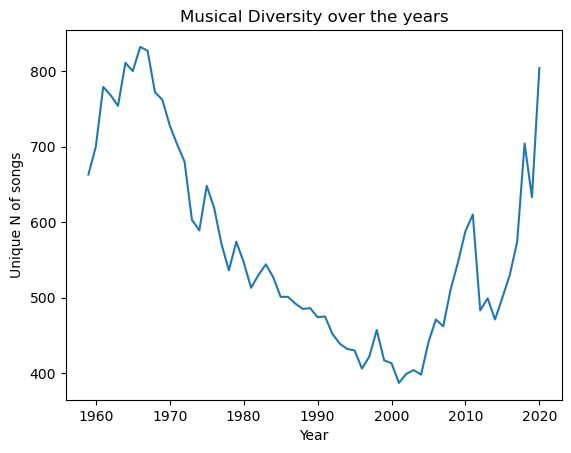

In [11]:
# Make a line graph
sns.lineplot(x='Year', y='Unique N of songs', data=musical_diversity)
plt.title('Musical Diversity over the years');

>- Overall, after peaking in 1966, the number of unique songs showed a decreasing trend until around 2000. After that, it started to increase, indicating a rise in musical diversity. It appears that until 2000, a smaller group of performers dominated the Billboard chart for longer weeks, whereas after 2000, there was a broader range of artists.
>- The year 1966 recorded the highest number of unique songs (832 songs), while the year 2001 recorded the lowest (387 songs). The median number of weeks a song spent on the Billboard chart in 1966 and 2001 was 6 and 14, respectively, showing a difference of more than 2 times. Specifically, 'Lifehouse - Hanging By A Moment' and 'Train - Drops Of Jupiter (Tell Me)' stayed on the Billboard chart of 2001 for more than 40 weeks.


## Part C

### Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career.
- Define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. 
- There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." 

In [12]:
# Reuse 'groupby' from part A by making it to DataFrame
groupby = pd.DataFrame(groupby)

# Define a 'ten-week hit'
mask = groupby['week'] >=10
ten_week_hit = groupby[mask]

In [13]:
# initalize lists
ten_week_artists = []
N_of_hit_songs = []

# Fill lists by iterating 'ten_week_hit' 
temp = ten_week_hit.T
for artist in temp.columns:
    ten_week_artists.append(artist[0])
    N_of_hit_songs.append(temp[artist].count().sum())

# Create DataFrame using two lists and filter 19 artists who had at least 30 songs within 'ten-week hits'
temp = pd.DataFrame({'performer':ten_week_artists, 'N_of_hitsongs':N_of_hit_songs}).groupby('performer').count()
artists_19 = temp[temp['N_of_hitsongs'] >=30]
print('<19 artists who have had at least 30 songs that were "ten-week hits">')
artists_19

<19 artists who have had at least 30 songs that were "ten-week hits">


,N_of_hitsongs
performer,
Billy Joel,32
Brad Paisley,30
Chicago,31
Daryl Hall John Oates,30
Drake,31
Elton John,52
George Strait,30
Jason Aldean,30
Keith Urban,36


In [14]:
artists_19.max(), artists_19.min(), artists_19.mean(), artists_19.median()

(N_of_hitsongs    52
 dtype: int64,
 N_of_hitsongs    30
 dtype: int64,
 N_of_hitsongs    34.684211
 dtype: float64,
 N_of_hitsongs    33.0
 dtype: float64)

In [15]:
artists_19[artists_19['N_of_hitsongs'] == 30]

,N_of_hitsongs
performer,
Brad Paisley,30
Daryl Hall John Oates,30
George Strait,30
Jason Aldean,30
Neil Diamond,30


Text(0.5, 1.0, '19 artists that have at least 30 songs of ten-week-hits')

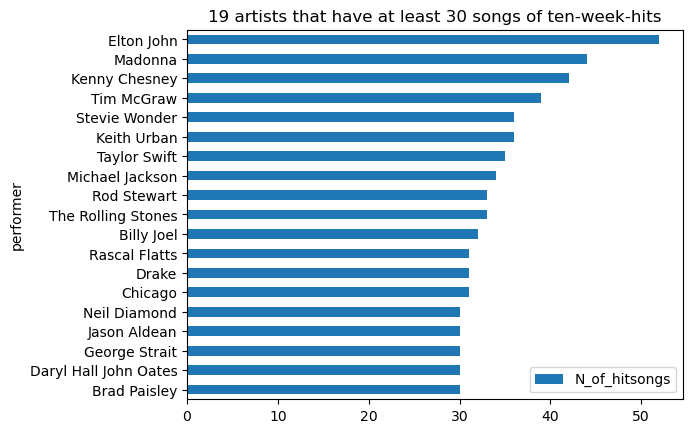

In [16]:
# Make a bar plot for 19 artists
artists_19 = artists_19.sort_values(by='N_of_hitsongs')
artists_19.plot(kind='barh')
plt.title('19 artists that have at least 30 songs of ten-week-hits')

> - The mean number of ten-week hit songs is approximately 35, with a median of 33.
> - Elton John had the highest number of ten-week hit songs, totaling 52.
> - Five performers had the lowest number of ten-week hit songs, which was 30.